# Aula 6: Classificação - Knn, Regressão Logistica, Naive Bayes.

### Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Repita todos os passos acima para a base de dados BreastCancer.

Vamos inicialmente ler os dados:

In [135]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

Número de linhas e colunas na matriz de atributos: (683, 11)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


Vamos construir as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

Convertemos os dados para o formato Numpy para facilitar a sua manipulação. 

In [136]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [138]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 1.35242395e-16  1.14435873e-16  0.00000000e+00 -6.24195668e-17
  4.68146751e-17 -2.08065223e-17  0.00000000e+00  3.12097834e-17
  2.08065223e-17  3.12097834e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [139]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

A partir desse conjunto de dados, podemos realizar a classificação.

## k-vizinhos

Para realizar a classificação, vamos usar a biblioteca scikit-learn (https://scikit-learn.org). É possível implementar o método usando métricas diferentes da Euclidiana, como as que podem ser vistas em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Vamos ajustar o modelo. Inicialmente, vamos considerar o método hold-out para selecionar o conjunto de teste e treinamento, que seleciona uma fração p de elementos para o conjunto de teste e (1-p), para treinamento. A seleção do modelo será feita mais adiante usando validação cruzada.

Relizando a classificação pelo método dos k-vizinhos:

In [90]:
from sklearn.neighbors import KNeighborsClassifier
k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

O erro na classificação pode ser quantificado pela medida de acurácia.

In [91]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9562043795620438


Notem quem o valor da acurácia depende do número de vizinhos $k$. Podemos selecionar o melhor valor de $k$ usando validação cruzada. 

Número de linhas e colunas na matriz de atributos: (683, 11)


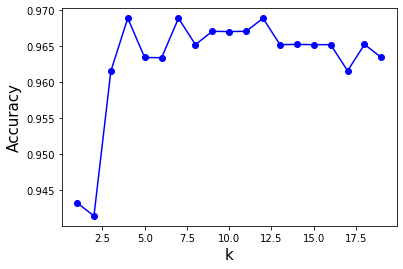

Melhor k: 4


In [92]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)



nkf = 10 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

Usando todo o conjunto de treinamento, podemos ajustar o modelo e realizar a classificação no conjunto de teste.

In [42]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.9343065693430657


## Regressão logística

Outro classificador importante é a regressão logística. Para usarmos esse método, vamos ler os dados novamente.

In [140]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

Número de linhas e colunas na matriz de atributos: (683, 11)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


Convertendo para o formato Numpy e normalizando:

In [141]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste usando o método hold-out.

In [142]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Realizando a classificação por regressão logística:

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.9562043795620438


## Naive Bayes

No classificador Naive Bayes, podemos assumir que os atributos são normalmente distribuídos.

Lendo os dados novamente para evitar que alguma transformação anterior afete os resultados.

In [144]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

Número de linhas e colunas na matriz de atributos: (683, 11)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


Padronizando os dados.

In [145]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionando os conjuntos de treinamento e teste.

In [146]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Podemos realizar a classificação.

In [147]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9635036496350365


Outra maneira de efetuarmos a classificação é assumirmos que os atributos possuem distribuição diferente da normal. 

Uma possibilidade é assumirmos que os dados possuem distribuição de Bernoulli. 

In [148]:
from sklearn.naive_bayes import BernoulliNB
# Usamos a função BernoulliNB para realizar a classificação usando a distribuição de Bernoulli
model = BernoulliNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9635036496350365


2 - Compare os três metodos de classificação para a base vertebralcolumn-3C.

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = [
    ('knn10', KNeighborsClassifier(10, metric = 'euclidean')),
    ('gaussianNB', GaussianNB()),
#     ('multinomialNB', MultinomialNB()),
    ('logreg', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
]

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
target = data.pop(data.columns[-1])

X = data.values
y = target.values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = .2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

for name, model in models:
    model.fit(X_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(X_test, y_test)))

Accuracy (knn10): 	0.8064516129032258
Accuracy (gaussianNB): 	0.8709677419354839
Accuracy (logreg): 	0.8548387096774194


3 - Em um mesmo gráfico, mostre a acurácia e função de k, para o método k-vizinhos, considerando as bases Iris, BreastCancer e Vehicle.

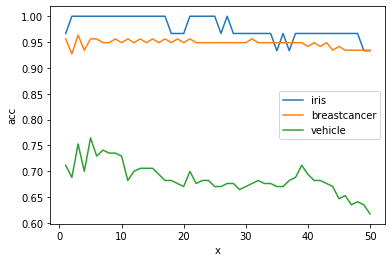

In [27]:
def getdata(path):
    data = pd.read_csv(path, header=(0))
    data = data.dropna(axis='rows') #remove NaN
    target = data.pop(data.columns[-1])

    X = data.values
    y = target.values

    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    p = .2
    return train_test_split(X, y, test_size = p, random_state = 42)

datasets = [
    ('iris', 'data/iris.csv'),
    ('breastcancer', 'data/BreastCancer.csv'),
    ('vehicle', 'data/Vehicle.csv')
]

ks = list(range(1, 50 + 1))
for name, path in datasets:
    acc = []
    X_train, X_test, y_train, y_test = getdata(path)
    for k in ks:
        model = KNeighborsClassifier(k)
        model.fit(X_train, y_train)
        acc.append(model.score(X_test, y_test))
    plt.plot(ks, acc, label = name)

plt.xlabel('x')
plt.ylabel('acc')
plt.legend()
plt.show()
        

4 - Considerando a base de dados Vehicle, projete os dados em duas dimensões usando PCA e mostre as regiões de separação como feito acima.

Para o método k-vizinhos mais próximos:

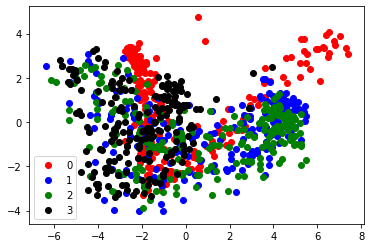

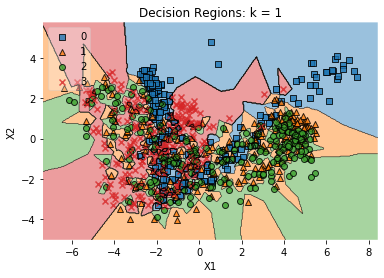

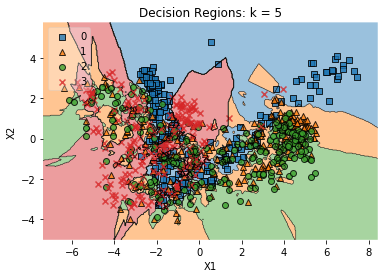

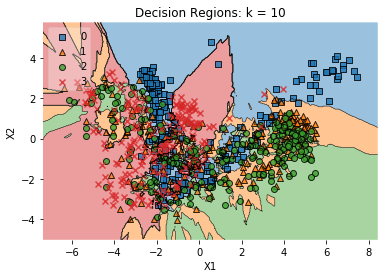

In [30]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# # Gera os dados em duas dimensões
# n_samples = 100 # número de observações
# # centro dos grupos
# centers = [(-4, 0), (0, 0), (3, 3)]
# X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
#                          shuffle=False, random_state=42)
data = pd.read_csv('data/Vehicle.csv')
data = data.dropna(axis='rows') #remove NaN
target = data.pop(data.columns[-1])

X = data.values
y = target.values
lb = LabelEncoder()
y = lb.fit_transform(y)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    plt.show()

Para o classificador regressão logística:

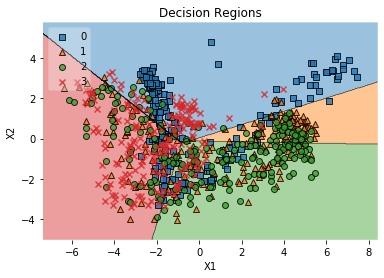

In [31]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

Notem que as curvas de separação são retas.

Para o classificador Naive Bayes:

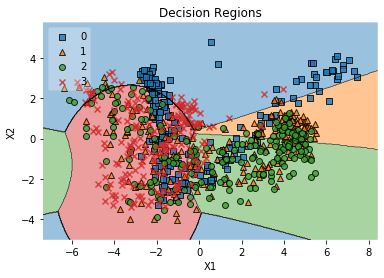

In [32]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()

5 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare os resultados para os métodos k-means, regressão logística e naive Bayes.

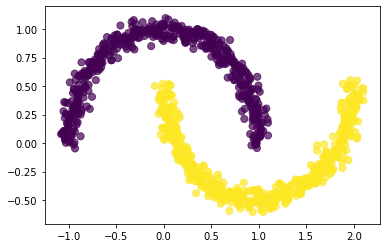

Accuracy (knn10): 	1.000
Accuracy (gaussianNB): 	0.865
Accuracy (logreg): 	0.875


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = [
    ('knn10', KNeighborsClassifier(10, metric = 'euclidean')),
    ('gaussianNB', GaussianNB()),
    ('logreg', LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000))
]

from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show()

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = .2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

for name, model in models:
    model.fit(X_train, y_train)
    print('Accuracy ({}): \t{:.3f}'.format(name, model.score(X_test, y_test)))

5 - Encontre a região de separação dos dados do exercício anterior.

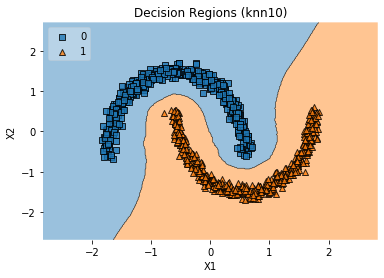

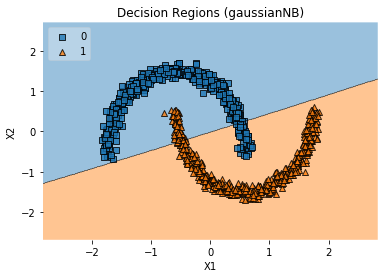

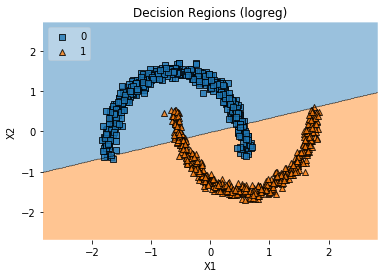

In [45]:
from mlxtend.plotting import plot_decision_regions

for name, model in models:
    model.fit(X_train, y_train)    

    plot_decision_regions(X, y, clf=model, legend=2)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions (%s)' % name)
    plt.show()